# Load Library

In [1]:
%pip install -U scikit-learn
%pip install seaborn
%pip install plotly
%pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from logisticRegression import logisticRegression

import matplotlib.pyplot as plt


import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Analize data

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


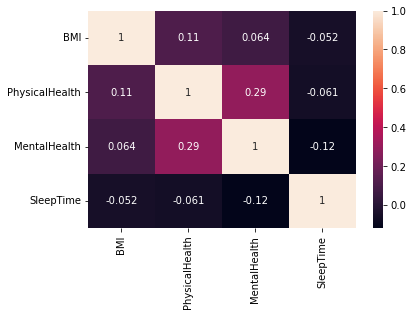

In [6]:
df.corr()
sn.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Plots

### Sex and HeartDisease

In [6]:
A0=['Male','Female']
B0=[] 
C0=[]
for a in A0:
    x=df.loc[(df['Sex']==a),:].loc[df['HeartDisease']=='Yes'].count()['HeartDisease']
    y=df.loc[(df['Sex'] ==a),].count()['HeartDisease']
    B0+=[x/y]
    C0+=[x]
fig = go.Figure()

px.bar(A0,B0,color=C0,y=A0)

In [7]:
D={}
L=['Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
for l in L:
    D[l]=[0,0]
Z=['No','Yes']
for l in L:
    for i in Z:
        x=df.loc[(df[l]==i),:].loc[df['HeartDisease']=='Yes'].HeartDisease.count()
        y=df.loc[(df[l]==i),].count()['HeartDisease']
        r=Z.index(i)
        D[l][r]=x/y
print(D)
fig = make_subplots(rows=2, cols=4, subplot_titles=L)
B=[None]*8
r=0
for i in range(1,3):
    for j in range(1,5):
        B[r]=(i,j)
        r+=1
r=0
for l in L:
    fig.add_trace(go.Bar(x=['No','Yes'], y=D[l],name=l), row=B[r][0], col=B[r][1])
    r+=1

fig.update_layout(height=1200, width=1500, title_text="effect for some factors on heart disease")
fig.show()
fig.write_image("dataVs.png")

{'Smoking': [0.0603341370078824, 0.12157715983867544], 'AlcoholDrinking': [0.08802152890093887, 0.05239472838315654], 'Stroke': [0.07468982146454964, 0.3636589609743972], 'DiffWalking': [0.0629845489042613, 0.22580499887412744], 'PhysicalActivity': [0.13758734931373368, 0.07053239069677404], 'Asthma': [0.08103335584259884, 0.11506344467251353], 'KidneyDisease': [0.07765181029556906, 0.29331861787927666], 'SkinCancer': [0.0772236323006042, 0.16700761259599584]}


# Clean data

## Detect missing data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Change yes and not to 1 and 0 respectively 

In [9]:
df.HeartDisease             =   df.HeartDisease.map(dict(Yes=1,No=0))
df.Smoking                  =   df.Smoking.map(dict(Yes=1,No=0))
df.AlcoholDrinking          =   df.AlcoholDrinking.map(dict(Yes=1,No=0))
df.Stroke                   =   df.Stroke.map(dict(Yes=1,No=0))
df.DiffWalking              =   df.DiffWalking.map(dict(Yes=1,No=0))
df.Diabetic                 =   df.Diabetic.map(dict(Yes=1,No=0))
df.PhysicalActivity         =   df.PhysicalActivity.map(dict(Yes=1,No=0))
df.Asthma                   =   df.Asthma.map(dict(Yes=1,No=0))
df.KidneyDisease            =   df.KidneyDisease.map(dict(Yes=1,No=0))
df.SkinCancer               =   df.SkinCancer.map(dict(Yes=1,No=0))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          310455 non-null  float64
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [10]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0.0,1,Very good,8.0,0,0,0


## Change tex to col

#### Sex

In [11]:
df['Female']=df.Sex.map(dict(Female=1,Male=0))
df['Male']  =df.Sex.map(dict(Male=1,Female=0))
df=df.drop(columns='Sex')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male
0,0,16.60,1,0,0,3.0,30.0,0,55-59,White,1.0,1,Very good,5.0,1,0,1,1,0
1,0,20.34,0,0,1,0.0,0.0,0,80 or older,White,0.0,1,Very good,7.0,0,0,0,1,0
2,0,26.58,1,0,0,20.0,30.0,0,65-69,White,1.0,1,Fair,8.0,1,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,75-79,White,0.0,0,Good,6.0,0,0,1,1,0
4,0,23.71,0,0,0,28.0,0.0,1,40-44,White,0.0,1,Very good,8.0,0,0,0,1,0


#### Race

In [12]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [13]:
df['White']                                 =df.Race.map(dict(White=1))
df['Black']                                 =df.Race.map(dict(Black=1))
df['Asian']                                 =df.Race.map(dict(Asian=1))
dic = {'American Indian/Alaskan Native':1}
df['American Indian/Alaskan Native']        =df.Race.map(dic)
df['Other']                                 =df.Race.map(dict(Other=1))
df['Hispanic']                              =df.Race.map(dict(Hispanic=1))
df=df.fillna(0)
df=df.drop(columns='Race')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   AgeCategory                     319795 non-null  object 
 9   Diabetic                        319795 non-null  float64
 10  PhysicalActivity                319795 non-null  int64  
 11  GenHealth                       319795 non-null  object 
 12  SleepTime       

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic
0,0,16.60,1,0,0,3.0,30.0,0,55-59,1.0,...,0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,80 or older,0.0,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,65-69,1.0,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,75-79,0.0,...,0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,40-44,0.0,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0


#### AgeCategory

In [14]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [15]:
dic = { '80 or older':13, '75-79':12,   '70-74':11, 
        '65-69':10      , '60-64':9 ,   '55-59':8, '50-54':7, 
        '45-49':6       , '40-44':5 ,   '35-39':4, '30-34':3, 
        '25-29':2       , '18-24':1 ,   '1-17':0}
df['AgeCategory']        =df.AgeCategory.map(dic)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   AgeCategory                     319795 non-null  int64  
 9   Diabetic                        319795 non-null  float64
 10  PhysicalActivity                319795 non-null  int64  
 11  GenHealth                       319795 non-null  object 
 12  SleepTime       

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic
0,0,16.60,1,0,0,3.0,30.0,0,8,1.0,...,0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,13,0.0,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,10,1.0,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,12,0.0,...,0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,5,0.0,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0


#### GenHealth

In [16]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [17]:
df['Fair']                                 =df.GenHealth.map(dict(White=1))
df['Good']                                 =df.GenHealth.map(dict(Black=1))
df['Poor']                                 =df.GenHealth.map(dict(Asian=1))
dic = {'Very good':1}
df['Very good']                            =df.GenHealth.map(dic)
df['Excellent']                            =df.GenHealth.map(dict(Other=1))
df=df.fillna(0)
df=df.drop(columns='GenHealth')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   AgeCategory                     319795 non-null  int64  
 9   Diabetic                        319795 non-null  float64
 10  PhysicalActivity                319795 non-null  int64  
 11  SleepTime                       319795 non-null  float64
 12  Asthma          

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,Black,Asian,American Indian/Alaskan Native,Other,Hispanic,Fair,Good,Poor,Very good,Excellent
0,0,16.60,1,0,0,3.0,30.0,0,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,10,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
